In [1]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
import cv2

In [3]:
def convolve(image, K):
    # grab the spatial dimensions of the image and kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = K.shape[:2]
    
    # allocate memory for the output image, taking care to "pad"
    # the borders of the input image so the spatial size (i.e.,
    # width and height) are not reduced
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
    cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float")
    
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top-to-bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            
            # perform the actual convolution by taking the
            # element-wise multiplication between the ROI and
            # the kernel, then summing the matrix
            k = (roi * K).sum()
            
            # store the convolved value in the output (x, y)-
            # coordinate of the output image
            output[y - pad, x - pad] = k
            
    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    
    # return the output image
    return output

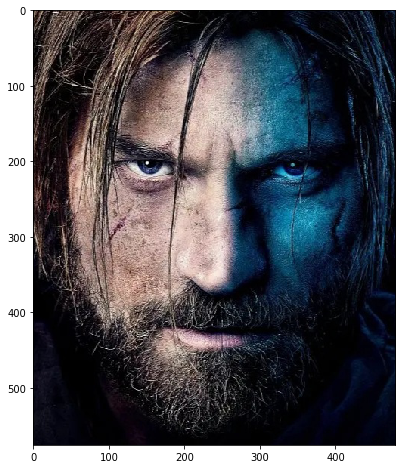

In [4]:
# path to the input image
originalImage = 'james.jpg'
rgbImage = plt.imread(originalImage)
plt.imshow(rgbImage)

In [5]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

In [6]:
# construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

# construct an emboss kernel
emboss = np.array((
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]), dtype="int")

In [7]:
# construct the kernel bank, a list of kernels we’re going to apply
# using both our custom ‘convole‘ function and OpenCV’s ‘filter2D‘
# function
kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY),
    ("emboss", emboss))

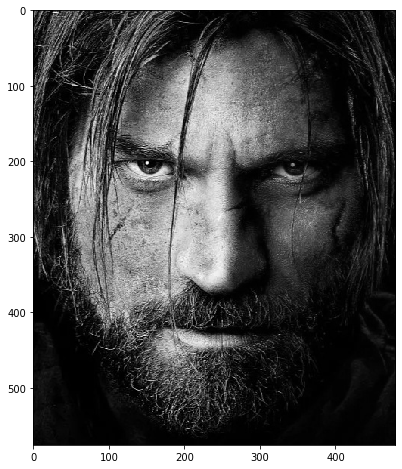

In [26]:
# load the input image and convert it to grayscale
grayImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2GRAY)
plt.imshow(grayImage)

(-0.5, 479.5, 575.5, -0.5)

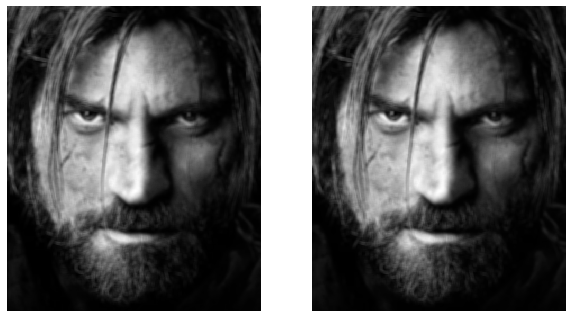

In [31]:
convolveOutput = convolve(grayImage, smallBlur)
opencvOutput = cv2.filter2D(grayImage, -1, smallBlur)
plt.subplot(1,2,1)
plt.imshow(convolveOutput)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(opencvOutput)
plt.axis('off')

(-0.5, 479.5, 575.5, -0.5)

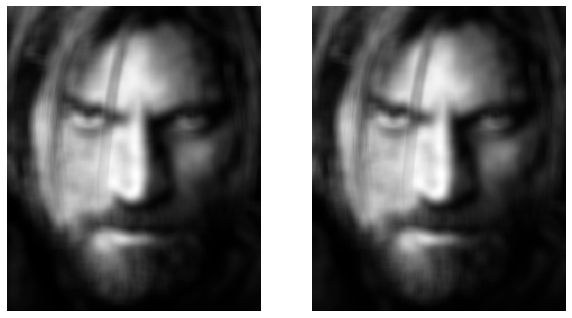

In [32]:
convolveOutput = convolve(grayImage, largeBlur)
opencvOutput = cv2.filter2D(grayImage, -1, largeBlur)
plt.subplot(1,2,1)
plt.imshow(convolveOutput)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(opencvOutput)
plt.axis('off')

(-0.5, 479.5, 575.5, -0.5)

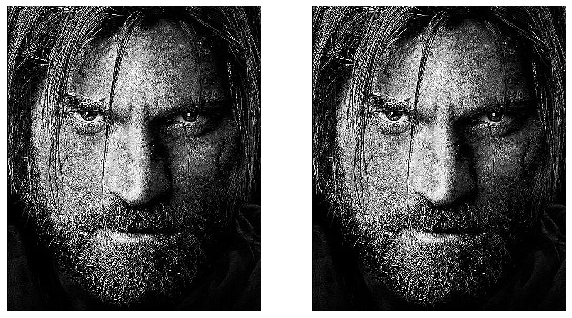

In [33]:
convolveOutput = convolve(grayImage, sharpen)
opencvOutput = cv2.filter2D(grayImage, -1, sharpen)
plt.subplot(1,2,1)
plt.imshow(convolveOutput)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(opencvOutput)
plt.axis('off')

(-0.5, 479.5, 575.5, -0.5)

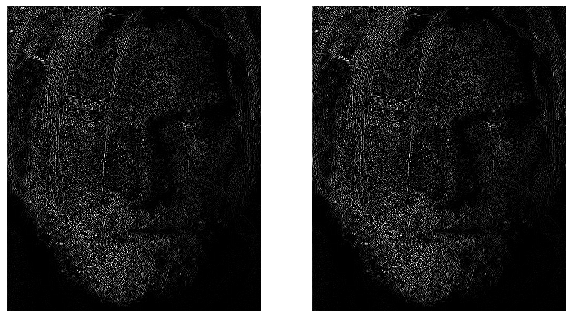

In [34]:
convolveOutput = convolve(grayImage, laplacian)
opencvOutput = cv2.filter2D(grayImage, -1, laplacian)
plt.subplot(1,2,1)
plt.imshow(convolveOutput)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(opencvOutput)
plt.axis('off')

(-0.5, 479.5, 575.5, -0.5)

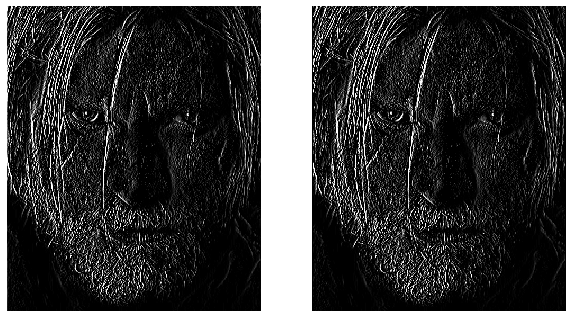

In [35]:
convolveOutput = convolve(grayImage, sobelX)
opencvOutput = cv2.filter2D(grayImage, -1, sobelX)
plt.subplot(1,2,1)
plt.imshow(convolveOutput)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(opencvOutput)
plt.axis('off')

(-0.5, 479.5, 575.5, -0.5)

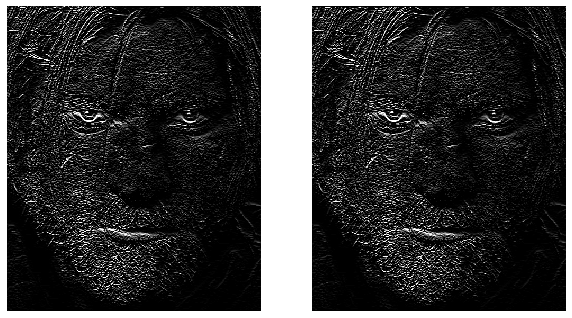

In [36]:
convolveOutput = convolve(grayImage, sobelY)
opencvOutput = cv2.filter2D(grayImage, -1, sobelY)
plt.subplot(1,2,1)
plt.imshow(convolveOutput)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(opencvOutput)
plt.axis('off')

(-0.5, 479.5, 575.5, -0.5)

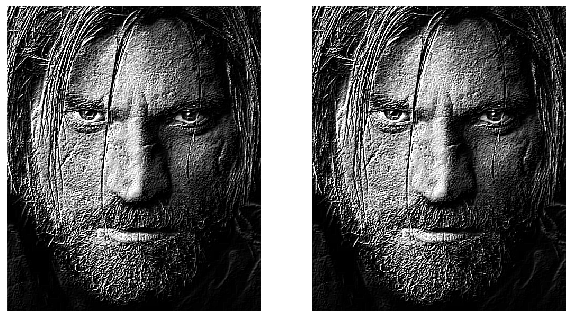

In [37]:
convolveOutput = convolve(grayImage, emboss)
opencvOutput = cv2.filter2D(grayImage, -1, emboss)
plt.subplot(1,2,1)
plt.imshow(convolveOutput)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(opencvOutput)
plt.axis('off')